In [8]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def modify(input_name, output_name):
    playground1 = pd.read_csv(input_name,low_memory=False)
    playground1 = playground1[["HIOS ID",
                               "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                              "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                              "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                              "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]]
    playground1 = playground1.where(playground1["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"] > 2000).dropna(how='all')

    playground1["IndPremiumPMM"] = playground1["1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / playground1["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
    playground1["IndCostsPMM"] = playground1["2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / playground1["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
    playground1["IndRTPMM"] = playground1["HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)"] / playground1["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
    playground1["IndPremiumMinusCostsPMM"] = playground1["IndPremiumPMM"] - playground1["IndCostsPMM"]
    playground1.to_csv(output_name)

In [5]:
modify("../Week7/Input/2014dataset.csv", "Data2000MM/2014dataset.csv")
modify("../Week7/Input/2015dataset.csv", "Data2000MM/2015dataset.csv")
modify("../Week7/Input/2016dataset.csv", "Data2000MM/2016dataset.csv")

In [29]:
data2014 = pd.read_csv("Data2000MM/2014dataset.csv",low_memory=False)
data2015 = pd.read_csv("Data2000MM/2015dataset.csv",low_memory=False)
data2016 = pd.read_csv("Data2000MM/2016dataset.csv",low_memory=False)

def plot(column1, column2, dataset, datasetname,dataset1, datasetname1,dataset2, datasetname2):
    fig, ax1 = plt.subplots(1, 3, sharey=True, figsize=(21, 7))
    ax1[0].set_title(str(column2) + " vs " + str(column1) + " in " + str(datasetname))
    ax1[0].plot(dataset[column1], 
             dataset[column2], '+', color='r')
    ax1[0].set_xlabel(column1)
    ax1[0].set_ylabel(column2)
    ax1[1].set_title(str(column2) + " vs " + str(column1) + " in " + str(datasetname1))
    ax1[1].plot(dataset1[column1], 
             dataset1[column2], '+', color='b')
    ax1[1].set_xlabel(column1)
    ax1[1].set_ylabel(column2)
    ax1[2].set_title(str(column2) + " vs " + str(column1) + " in " + str(datasetname2))
    ax1[2].plot(dataset2[column1], 
             dataset2[column2], '+', color='g')
    ax1[2].set_xlabel(column1)
    ax1[2].set_ylabel(column2)

    plt.show()

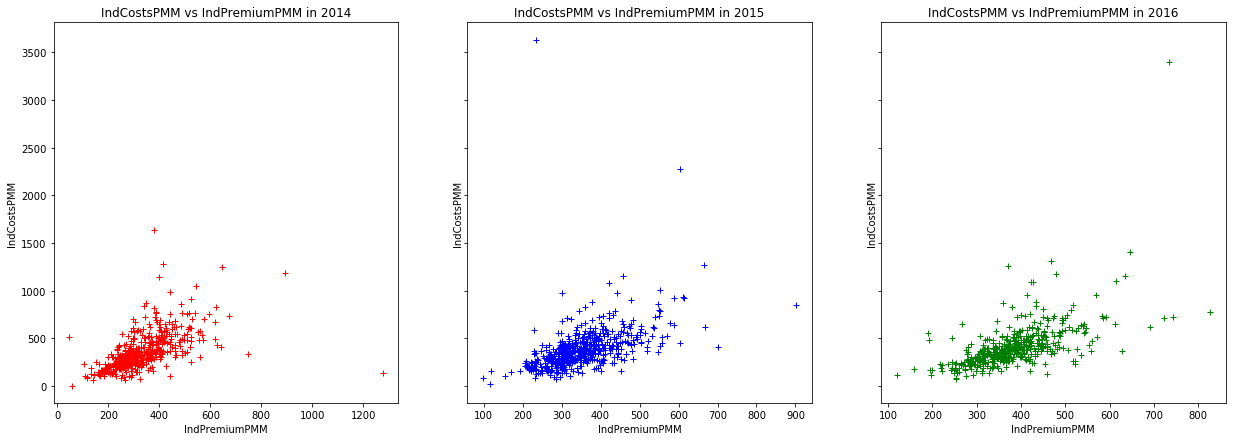

In [31]:
plot("IndPremiumPMM", "IndCostsPMM", data2014, "2014", data2015, "2015", data2016, "2016")

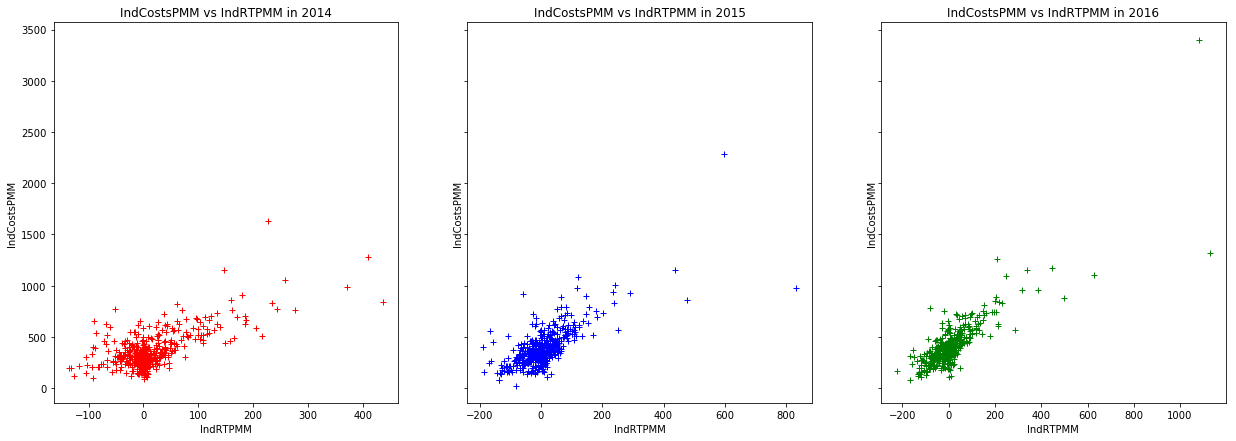

In [32]:
plot("IndRTPMM", "IndCostsPMM", data2014, "2014", data2015, "2015", data2016, "2016")

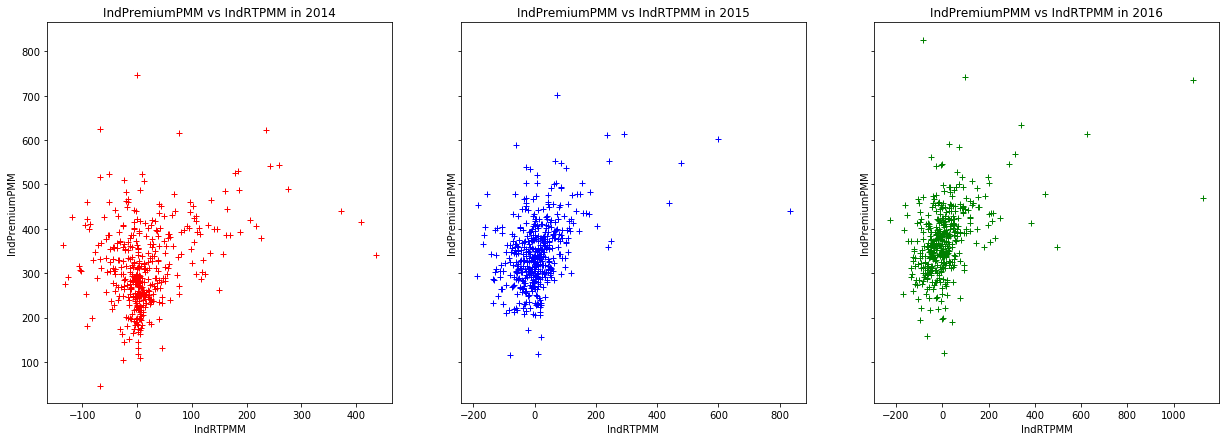

In [34]:
plot("IndRTPMM", "IndPremiumPMM", data2014, "2014", data2015, "2015", data2016, "2016")

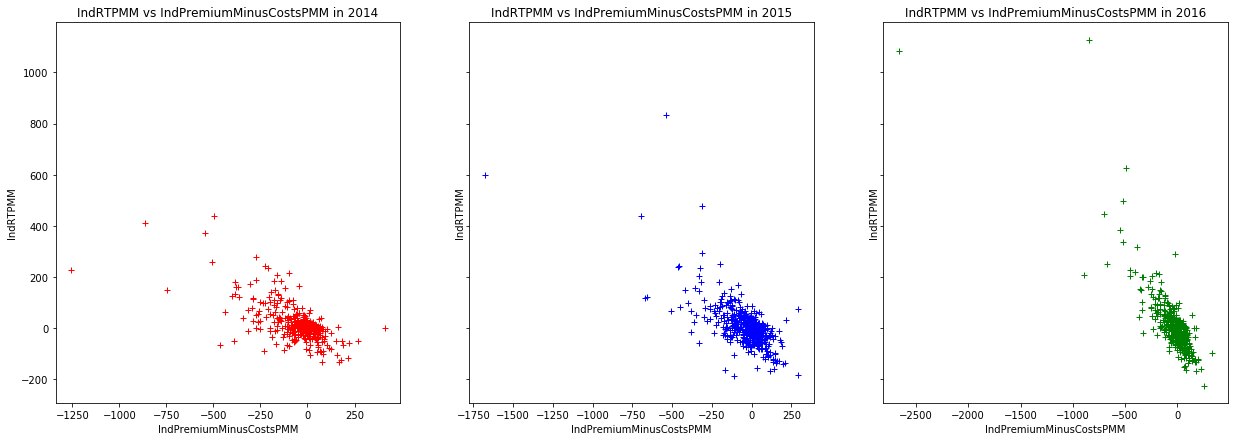

In [36]:
plot("IndPremiumMinusCostsPMM", "IndRTPMM", data2014, "2014", data2015, "2015", data2016, "2016")